
# Predictive Modeling for Customer Subscription in Banking Marketing Campaigns: Identifying Key Factors Using Machine Learning

## Project Overview
This project focuses on predicting customer subscription to term deposits in direct marketing campaigns conducted by a European bank. The primary goal is to identify key factors that influence customer behavior and build predictive models using machine learning techniques to optimize marketing strategies.


## Loading Data

In [200]:
import pandas as pd

# Load the dataset
file_path = 'Data Set.csv'  # Replace with the actual path to your file if it's not in the current directory
data = pd.read_csv(file_path)
# Display the first few rows of the dataset
print(data)

      age            job  marital          education  default housing loan  \
0      31    blue-collar  married           basic.6y  unknown      no   no   
1      32      housemaid   single  university.degree  unknown     yes   no   
2      26         admin.  married        high.school       no     yes   no   
3      44    blue-collar  married           basic.4y  unknown      no   no   
4      32     technician  married            unknown       no     yes   no   
...   ...            ...      ...                ...      ...     ...  ...   
1995   27     unemployed  married        high.school       no     yes   no   
1996   41     management  married  university.degree  unknown     yes   no   
1997   46  self-employed  married  university.degree       no     yes   no   
1998   42    blue-collar  married           basic.4y       no      no   no   
1999   54      housemaid  married           basic.4y  unknown      no   no   

        contact month day_of_week  ...  campaign  pdays  previo

## Missing Values

In [201]:
# Check for missing values
missing_values_count = data.isnull().sum()
print("Missing values in each column before dropping:\n", missing_values_count)

# Option 1: Remove rows with missing values
data_dropped_rows = data.dropna()

# Option 2: Remove columns with missing values
data_dropped_columns = data.dropna(axis=1)

# Check for missing values after removal
missing_values_count_rows = data_dropped_rows.isnull().sum()
missing_values_count_columns = data_dropped_columns.isnull().sum()

print("\nMissing values after dropping rows:\n", missing_values_count_rows)
print("\nMissing values after dropping columns:\n", missing_values_count_columns)

# Optionally, you can choose to drop rows or columns based on the result
# Here, we'll assume dropping rows
data = data_dropped_rows

Missing values in each column before dropping:
 age               0
job               8
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     8
euribor3m         9
nr.employed       0
subscribe         0
dtype: int64

Missing values after dropping rows:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribe         0
dtype: int64

Missing values after dropping columns:
 age    

### Insights:
- Conducted an initial assessment of the dataset to identify any missing values.
- Found that the dataset contained a total of 24 missing values, representing less than 1% of the overall data.
- Given the minimal impact of these missing values on the dataset, I decided to remove the rows with missing entries instead of employing imputation methods.
- This approach was taken to maintain the integrity of the dataset and avoid introducing potential bias or inaccuracies that could arise from filling in missing values.
- The removal of these rows ensured a cleaner dataset for further analysis and modeling without significantly affecting the overall sample size.



## Feature Selection

#### 1. Feature Mappings
- Created mappings for each categorical feature (e.g., `job`, `marital`, `education`, etc.) to explore the unique values present in each category.
- Printed out these mappings for revie leakage and improving model efficiency.


In [202]:
# Create mappings for each categorical feature
job_mapping = data['job'].unique()
marital_mapping = data['marital'].unique()
education_mapping = data['education'].unique()
default_mapping = data['default'].unique()
housing_mapping = data['housing'].unique()
loan_mapping = data['loan'].unique()
contact_mapping = data['contact'].unique()
month_mapping = data['month'].unique()
day_of_week_mapping = data['day_of_week'].unique()
poutcome_mapping = data['poutcome'].unique()
# Print mappings
print("Job Mapping:", job_mapping)
print("Marital Mapping:", marital_mapping)
print("Education Mapping:", education_mapping)
print("Default Mapping:", default_mapping)
print("Housing Mapping:", housing_mapping)
print("Loan Mapping:", loan_mapping)
print("Contact Mapping:", contact_mapping)
print("Month Mapping:", month_mapping)
print("Day of Week Mapping:", day_of_week_mapping)
print("Poutcome Mapping:", poutcome_mapping)

Job Mapping: ['blue-collar' 'housemaid' 'admin.' 'technician' 'services' 'management'
 'job' 'retired' 'student' 'self-employed' 'entrepreneur' 'unknown'
 'unemployed']
Marital Mapping: ['married' 'single' 'divorced' 'unknown']
Education Mapping: ['basic.6y' 'university.degree' 'high.school' 'basic.4y' 'unknown'
 'professional.course' 'basic.9y' 'illiterate']
Default Mapping: ['unknown' 'no']
Housing Mapping: ['no' 'yes' 'unknown']
Loan Mapping: ['no' 'yes' 'unknown']
Contact Mapping: ['cellular' 'telephone']
Month Mapping: ['jul' 'apr' 'may' 'aug' 'jun' 'nov' 'oct' 'dec' 'sep' 'mar']
Day of Week Mapping: ['mon' 'tue' 'fri' 'wed' 'thu']
Poutcome Mapping: ['nonexistent' 'failure' 'success']


### 2. Point Biserial Correlation for Numerical Features
- Converted the target variable `subscribe` into binary form (`1` for 'yes' and `0` for 'no').
- Identified numerical features (e.g., `age`, `duration`, `campaign`, etc.) to evaluate their correlation with the target variable.


In [203]:
import pandas as pd
from scipy.stats import pointbiserialr


# Convert target variable to binary
data['subscribe'] = data['subscribe'].map({'yes': 1, 'no': 0})

# # List of numerical features
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                      'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                      'euribor3m', 'nr.employed']

# Calculate Point Biserial Correlation
for feature in numerical_features:
    correlation, p_value = pointbiserialr(data[feature], data['subscribe'])
    print(f"Point Biserial Correlation between {feature} and subscribe: {correlation:.4f} (p-value: {p_value:.4f})")


Point Biserial Correlation between age and subscribe: 0.0513 (p-value: 0.0225)
Point Biserial Correlation between duration and subscribe: 0.3612 (p-value: 0.0000)
Point Biserial Correlation between campaign and subscribe: -0.0320 (p-value: 0.1545)
Point Biserial Correlation between pdays and subscribe: -0.3378 (p-value: 0.0000)
Point Biserial Correlation between previous and subscribe: 0.2108 (p-value: 0.0000)
Point Biserial Correlation between emp.var.rate and subscribe: -0.2889 (p-value: 0.0000)
Point Biserial Correlation between cons.price.idx and subscribe: -0.1074 (p-value: 0.0000)
Point Biserial Correlation between cons.conf.idx and subscribe: 0.0283 (p-value: 0.2080)
Point Biserial Correlation between euribor3m and subscribe: -0.2973 (p-value: 0.0000)
Point Biserial Correlation between nr.employed and subscribe: -0.3467 (p-value: 0.0000)


- Computed the **Point Biserial Correlation** between each numerical feature and the target variable (`subscribe`).
- Based on the correlation values and statistical significance (p-values), the following features were dropped:
  - **Dropped Features**:
    - `duration`: Strong positive correlation, but known only after the call, leading to potential data leakage.
    - `campaign`: Weak correlation and not statistically significant.
    - `age` and `cons.conf.idx`: Very weak correlations, making them poor predictors.

In [204]:

# List of numerical features to drop
features_to_drop = ['duration', 'campaign', 'cons.conf.idx','age']

# Drop the specified features
data = data.drop(columns=features_to_drop)

# Verify the features have been dropped
print("Remaining columns after dropping specified features:")
print(data.columns)

Remaining columns after dropping specified features:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'euribor3m', 'nr.employed', 'subscribe'],
      dtype='object')



### 3. Chi-Square Test and Cramér's V for Categorical Features
- Selected categorical features (e.g., `job`, `marital`, `education`, etc.) for evaluation.
- Created contingency tables between each categorical feature and the target variable.
- Performed a **Chi-Square Test of Independence** to evaluate the relationship between each categorical feature and the target variable.
- Calculated **Cramér's V** to measure the strength of association between categorical features and the target variable.



In [205]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# List of categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 
                        'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Calculate Chi-Square and Cramér's V
for feature in categorical_features:
    # Create contingency table
    contingency_table = pd.crosstab(data[feature], data['subscribe'])
    
    # Perform Chi-Square Test of Independence
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate Cramér's V
    cramers_v_value = cramers_v(contingency_table.values)
    
    print(f"Chi-Square Test between {feature} and subscribe: Chi2 = {chi2:.4f}, p-value = {p:.4f}")
    print(f"Cramér's V for {feature}: {cramers_v_value:.4f}\n")


Chi-Square Test between job and subscribe: Chi2 = 80.1535, p-value = 0.0000
Cramér's V for job: 0.2014

Chi-Square Test between marital and subscribe: Chi2 = 7.2202, p-value = 0.0652
Cramér's V for marital: 0.0604

Chi-Square Test between education and subscribe: Chi2 = 6.8698, p-value = 0.4426
Cramér's V for education: 0.0590

Chi-Square Test between default and subscribe: Chi2 = 22.7529, p-value = 0.0000
Cramér's V for default: 0.1073

Chi-Square Test between housing and subscribe: Chi2 = 3.0602, p-value = 0.2165
Cramér's V for housing: 0.0394

Chi-Square Test between loan and subscribe: Chi2 = 1.0215, p-value = 0.6000
Cramér's V for loan: 0.0227

Chi-Square Test between contact and subscribe: Chi2 = 28.2444, p-value = 0.0000
Cramér's V for contact: 0.1196

Chi-Square Test between month and subscribe: Chi2 = 170.1433, p-value = 0.0000
Cramér's V for month: 0.2934

Chi-Square Test between day_of_week and subscribe: Chi2 = 1.4605, p-value = 0.8336
Cramér's V for day_of_week: 0.0272

Ch

- Based on the Chi-Square test results, the following features were dropped:
  - **Dropped Features**:
    - `marital`: p-value > 0.05 indicates weak statistical significance.
    - `day_of_week`, `housing`, and `education`: Weak correlations as indicated by low Cramér's V values.

In [184]:
# Drop the 'marital' and 'day_of_week' columns
data = data.drop(columns=['marital', 'day_of_week','housing','education'])

# Verify the changes
print(data.head())


           job  default loan   contact month  pdays  previous     poutcome  \
0  blue-collar  unknown   no  cellular   jul    999         0  nonexistent   
1    housemaid  unknown   no  cellular   jul    999         0  nonexistent   
2       admin.       no   no  cellular   apr    999         0  nonexistent   
3  blue-collar  unknown   no  cellular   may    999         0  nonexistent   
4   technician       no   no  cellular   jul    999         0  nonexistent   

   emp.var.rate  cons.price.idx  euribor3m  nr.employed  subscribe  
0           1.4          93.918      4.960       5228.1          0  
1           1.4          93.918      4.961       5228.1          0  
2          -1.8          93.075      1.405       5099.1          0  
3          -1.8          92.893      1.313       5099.1          0  
4           1.4          93.918      4.963       5228.1          0  



### Multi-Collinearity Analysis

#### 1. Correlation Heatmap
- Numerical features considered for multi-collinearity analysis:
  - `pdays`, `previous`, `emp.var.rate`, `cons.price.idx`, `euribor3m`, `nr.employed`, `subscribe`
  
- A **correlation matrix** was computed to examine the relationships between the numerical variables.

- **Correlation Heatmap**:
  - Visualized the correlation matrix using a heatmap to easily identify highly correlated features.
  - Color-coded values from `-1` to `1`, where `1` represents perfect positive correlation and `-1` represents perfect negative corerformance and interpretability.


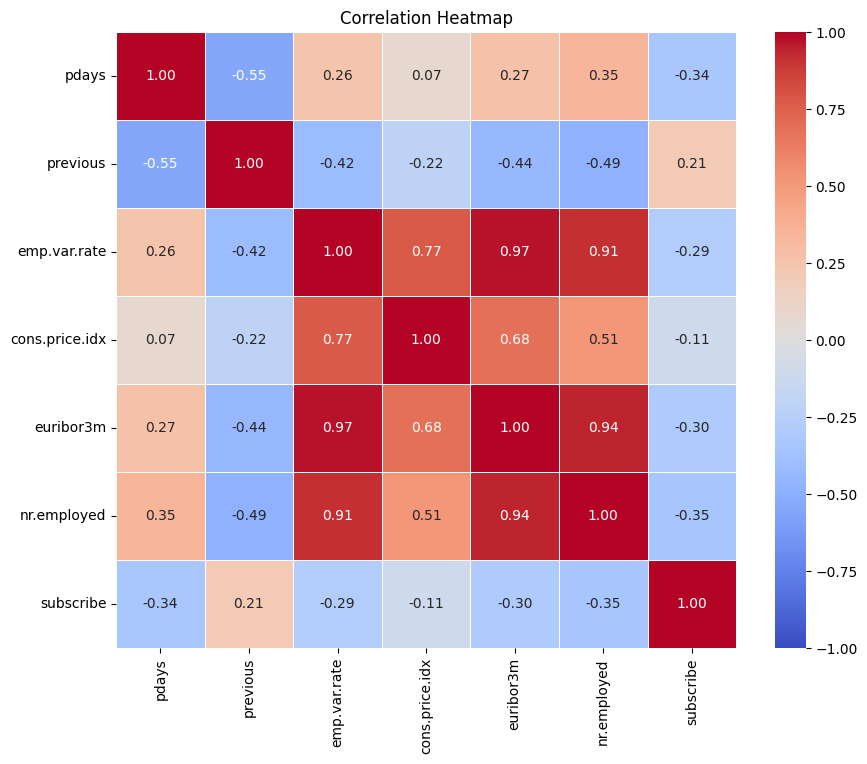

In [206]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Define numerical features
numerical_features = [ 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed','subscribe']

# Select only numerical columns
numerical_data = data[numerical_features]

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#### 2. Insights from the Heatmap:
- `emp.var.rate`, `euribor3m`, and `nr.employed` showed a high degree of correlation:
  - High correlations can introduce **multi-collinearity**, which can negatively impact model interpretability and stability.
  
#### 3. Decision:
- **Dropped `emp.var.rate` and `euribor3m`** to avoid redundancy and multicollinearity, keeping only `nr.employed` for modeling as it is representative of the other highly correlated features.

In [207]:
data = data.drop(columns=['emp.var.rate', 'euribor3m'])



### 4. DataFrame After Feature Selection
- After feature selection, the remaining columns in the DataFrame include:
    - **Categorical Features**: `job`, `default`, `loan`, `contact`, `month`, `poutcome`
    - **Numerical Features**: `pdays`, `previous`, `cons.price.idx`, `nr.employed`
    - **Target Variable**: `subscribe`


### Conclusion:
This workflow efficiently reduced the dimensionality of the dataset by removing features that did not provide meaningful information for predicting the target variable (`subscribe`). It ensured that the model focuses on the most relevant features, avoiding data leakage and improving model efficiency.


### Insights
- emp.var.rate, euribor3m and nr.employed are highly correlated
- considering only 'nr.employed' for modeling

In [162]:
data

,job,default,loan,contact,month,pdays,previous,poutcome,cons.price.idx,nr.employed,subscribe
0,blue-collar,unknown,no,cellular,jul,999,0,nonexistent,93.918,5228.1,0
1,housemaid,unknown,no,cellular,jul,999,0,nonexistent,93.918,5228.1,0
2,admin.,no,no,cellular,apr,999,0,nonexistent,93.075,5099.1,0
3,blue-collar,unknown,no,cellular,may,999,0,nonexistent,92.893,5099.1,0
4,technician,no,no,cellular,jul,999,0,nonexistent,93.918,5228.1,0
...,...,...,...,...,...,...,...,...,...,...,...
1986,entrepreneur,no,no,cellular,aug,999,0,nonexistent,93.444,5228.1,0
1987,blue-collar,no,no,telephone,may,999,0,nonexistent,93.994,5191.0,0
1988,admin.,no,no,telephone,jun,999,0,nonexistent,94.465,5228.1,0
1989,admin.,unknown,no,telephone,jun,999,0,nonexistent,94.465,5228.1,0


## Exploratory Data Analysis (EDA)

### 1. Categorical Features Distribution

The categorical features considered for analysis are:
- `job`, `default`, `loan`, `contact`, `month`, `poutcome`

For each categorical feature, a count plot is created to visualize the distribution. This provides an overview of the frequency of each category and helps identify class imbalances.

- **Visualized Categorical Features**:
  - Distribution plots show how data points are distributed across each category.
  - Rotation of x-axis labels helps with better readability for certain cing for further data preprocessing and model development.


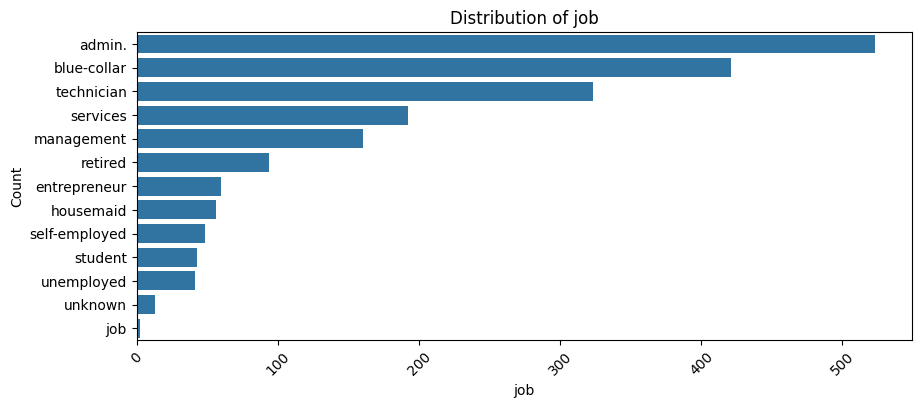

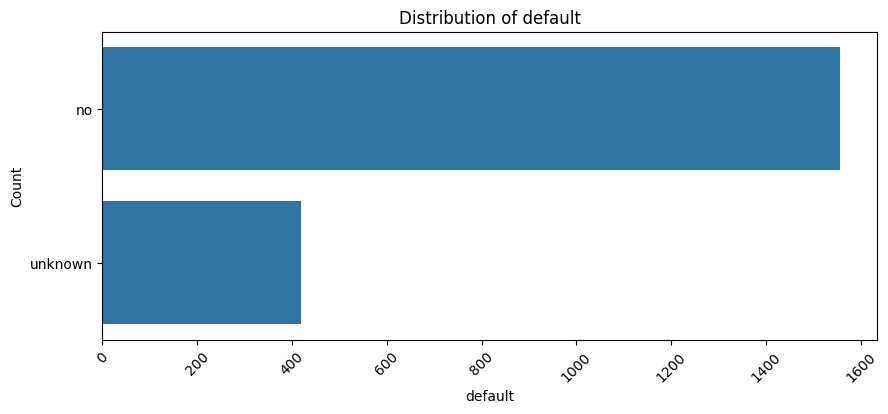

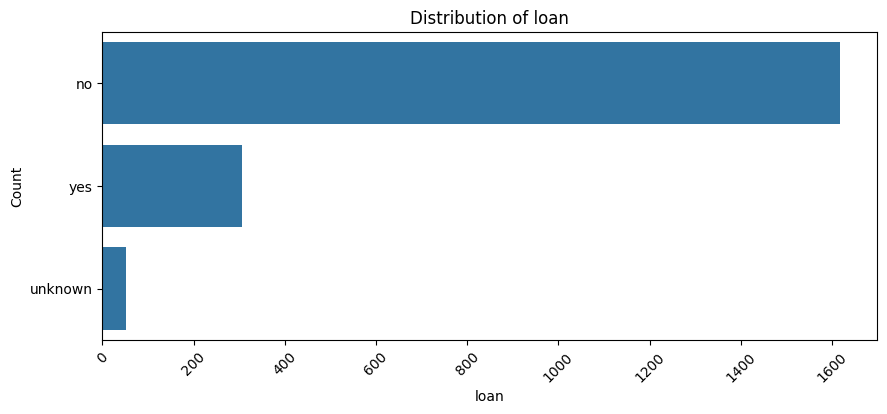

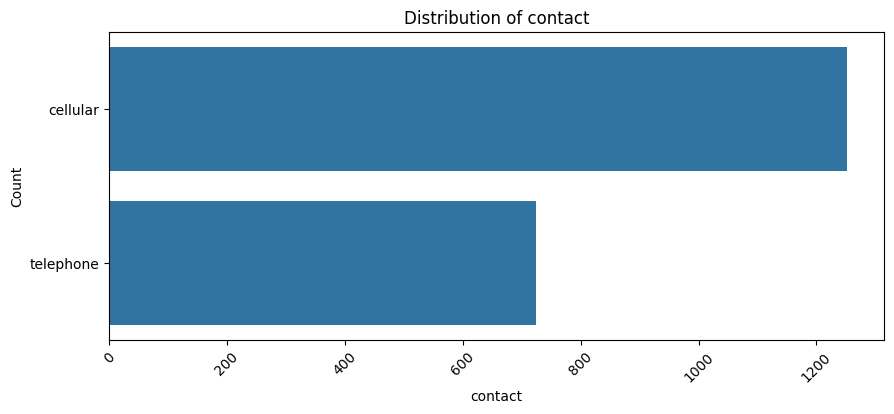

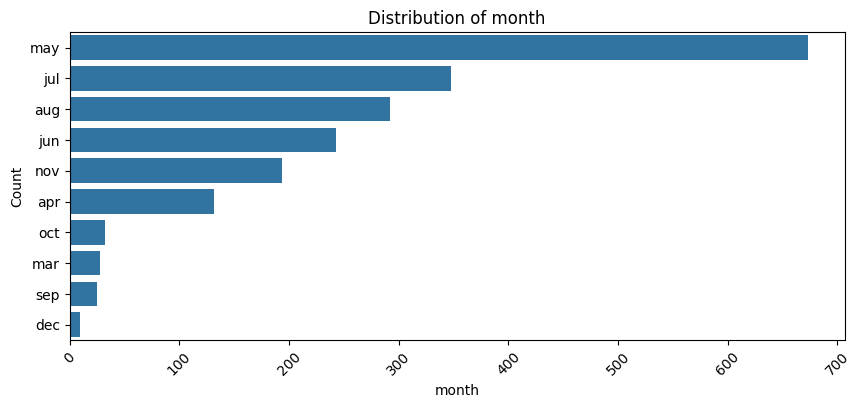

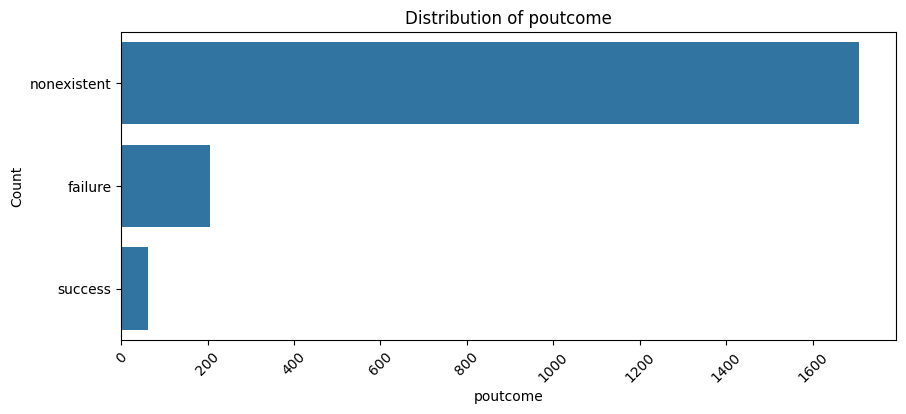

In [163]:
# Define the categorical features
categorical_features = ['job', 'default', 'loan', 'contact', 'month', 'poutcome']

# Plot distribution for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data[feature], order=data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()



### 2. Unique Values in Numerical Features

Two numerical features, `pdays` and `previous`, are examined to display the unique values in the dataset.

- **Unique Values**:
  - `pdays`: [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 18, 999]  
  - `previous`: [0, 1, 2, 3, 4, 5]

The presence of 999 in `pdays` might indicate a placeholder for missing or irrelevant values.




In [164]:
# Define the numerical features
numerical_features = ['pdays', 'previous']

# Print unique values for each numerical feature
for feature in numerical_features:
    unique_values = data[feature].unique()
    print(f"Unique values for {feature}: {sorted(unique_values)}\n")


Unique values for pdays: [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 18, 999]

Unique values for previous: [0, 1, 2, 3, 4, 5]



### 3. Numerical Features Distribution

The numerical features considered for distribution analysis include:
- `pdays`, `previous`, `cons.price.idx`, `nr.employed`

For each numerical feature, a histogram is plotted to understand the frequency distribution of values:
- **Distribution Insights**:
  - Each plot includes a kernel density estimate (KDE) curve to visualize the density of data points across values.
  - The distribution plots provide insight into skewness and outliers in numerical data.


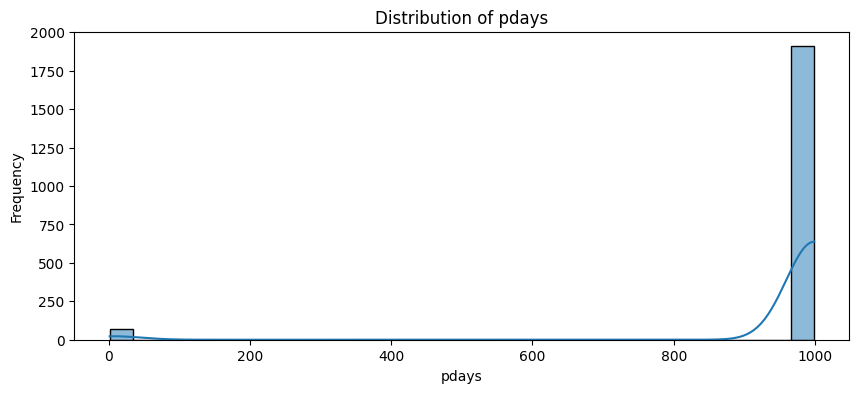

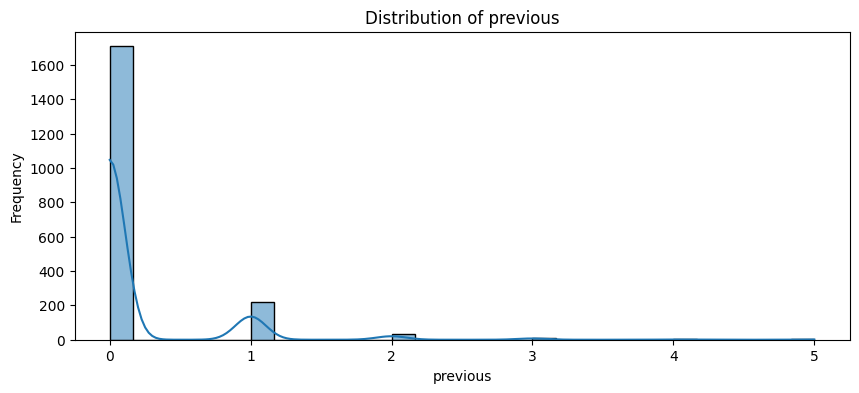

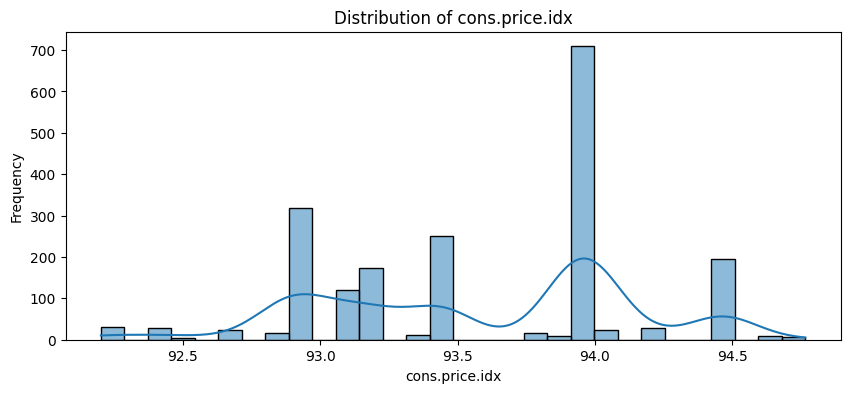

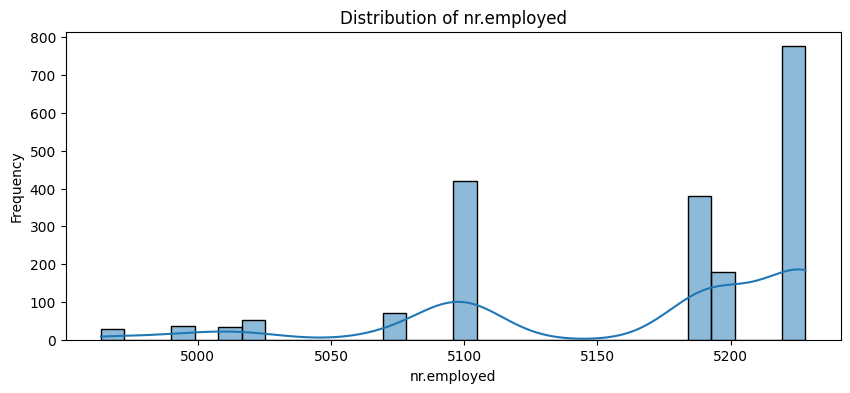

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the numerical features
numerical_features = ['pdays', 'previous', 'cons.price.idx', 'nr.employed']

# Plot distribution for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[feature], kde=True, bins=30)  # kde=True adds a density plot
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()



### 4. Box Plots for Numerical Features

Box plots for `cons.price.idx` and `nr.employed` are used to identify outliers and the spread of data.

- **Box Plot Insights**:
  - The box plot visualizes the interquartile range (IQR) and potential outliers beyond the whiskers.
  - Helps assess the presence of extreme values or any anomalies in the data.



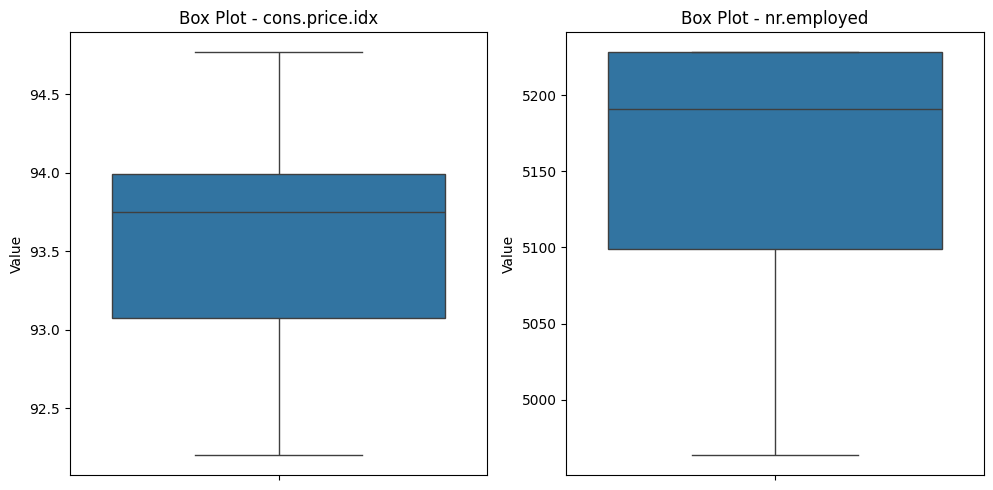

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to plot
features = ['cons.price.idx', 'nr.employed']

# Create box plots for the specified features
plt.figure(figsize=(15, 5))

for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=data[feature])
    plt.title(f'Box Plot - {feature}')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


### 5. Logarithmic Transformation

To address skewness in `cons.price.idx` and `nr.employed`, a logarithmic transformation was applied:

- **Logarithmic Transformation**:
  - A small constant is added to avoid issues with logarithm of zero values.
  - The transformation helps normalize skewed data, making it more suitable for machine learning models.

The transformed features were then re-plotted using histograms to assess the new distributions post-transformation.
- **Post-Transformation Distributions**:
  - The KDE curves for the transformed features show improved normality, making the data better suited for modeling.


In [167]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer

# Copy the original data to avoid modifying it directly
transformed_data = data.copy()

# Logarithmic Transformation for 'cons.price.idx' and 'nr.employed'
# Add a small constant to avoid log(0) issues
small_constant = 1e-6

transformed_data['cons.price.idx'] = np.log1p(transformed_data['cons.price.idx'] + small_constant)
transformed_data['nr.employed'] = np.log1p(transformed_data['nr.employed'] + small_constant)

# Saving the transformed data back into the original DataFrame
data = transformed_data


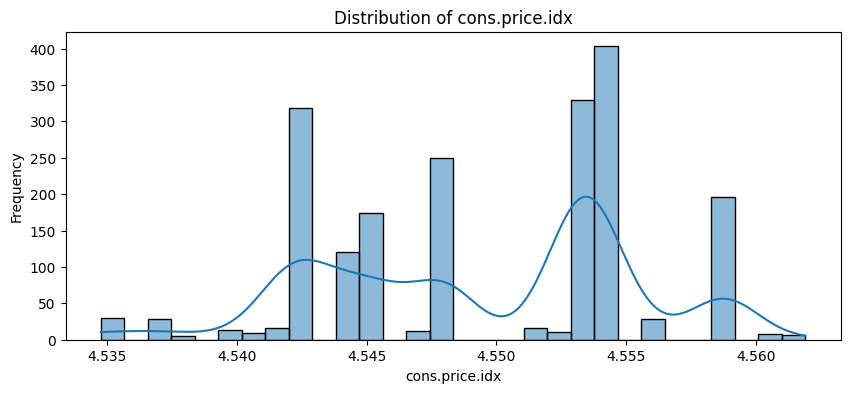

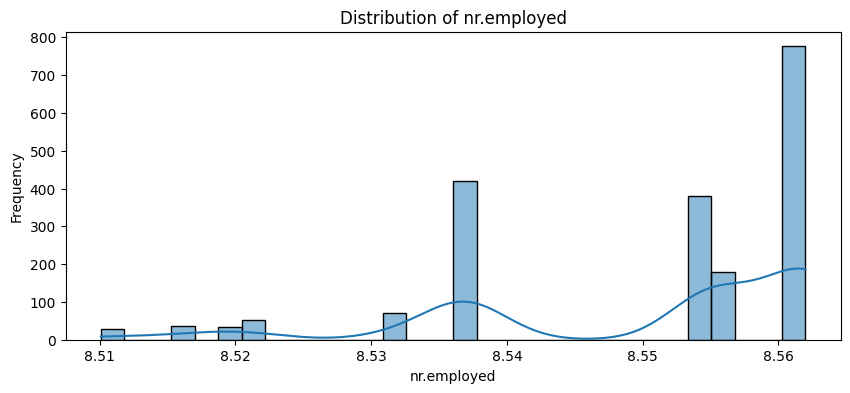

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the numerical features
numerical_features = ['cons.price.idx', 'nr.employed']

# Plot distribution for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[feature], kde=True, bins=30)  # kde=True adds a density plot
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


### 6. Conclusion

The EDA process reveals important characteristics of both categorical and numerical features:
- Distributions and unique values were analyzed to understand the data better.
- Outliers and skewness were handled using box plots and logarithmic transformations.
- These steps contribute to more informed decision-making for further data preprocessing and model development.

## SMOTE Analysis and Recursive Feature Elimination (RFE)

### 1. Class Imbalance Cheprevent bias towards the majority class.


In [169]:
# Check for class imbalance
class_counts = data['subscribe'].value_counts()
print("Class distribution:")
print(class_counts)


Class distribution:
subscribe
0    1781
1     195
Name: count, dtype: int64



### 2. Separating Categorical and Numerical Features
The dataset is split into categorical and numerical features for further processing:
- **Categorical Features**: `job`, `default`, `loan`, `contact`, `month`, `poutcome`
- **Numerical Features**: `pdays`, `previous`, `cons.price.idx`, `nr.employed`, `subscribe`




In [170]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Separate categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Creating separate DataFrames
categorical_data = data[categorical_columns]
numerical_data = data[numerical_columns]

# Display the column names for verification
print(f"Categorical columns: {list(categorical_columns)}")
print(f"Numerical columns: {list(numerical_columns)}")


Categorical columns: ['job', 'default', 'loan', 'contact', 'month', 'poutcome']
Numerical columns: ['pdays', 'previous', 'cons.price.idx', 'nr.employed', 'subscribe']



### 3. One-Hot Encoding for Categorical Variables
- One-hot encoding is applied to categorical features to convert them into binary columns. This allows machine learning algorithms to process the categorical data.

### 4. Train-Test Split
- The data is split into 70% training and 30% testing sets using `train_test_split`. The split is stratified to maintain the class distribution in both training and testing sets.
- **Train Set Distribution**: 1247 instances of class `0` and 136 instances of class `1`.
- **Test Set Distribution**: 534 instances of class `0` and 59 instances of class `1`.

In [171]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Define categorical and numerical features
categorical_features = [
    'job', 'default',
    'loan', 'contact', 'poutcome'
]
numerical_features = ['pdays', 'previous' ,'cons.price.idx', 'nr.employed'
]

# Define a mapping for each categorical feature
feature_mappings = {}
for feature in categorical_features:
    feature_mappings[feature] = sorted(data[feature].unique())

# One-Hot Encoding
encoder = OneHotEncoder(categories=[feature_mappings[feature] for feature in categorical_features], drop=None, sparse=False)
X_encoded = encoder.fit_transform(data[categorical_features])

# Extract numeric features
X_numeric = data[numerical_features]

# Combine encoded categorical features with numeric features
X_combined = pd.concat([pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out()), X_numeric.reset_index(drop=True)], axis=1)

# Target variable
y = data['subscribe']

# Step 1: Split the data into train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42, stratify=y)

# Step 2: Print the distribution of y_train
print("Distribution of y_train:")
print(y_train.value_counts())
print("Distribution of y_test:")
print(y_test.value_counts())


Distribution of y_train:
subscribe
0    1247
1     136
Name: count, dtype: int64
Distribution of y_test:
subscribe
0    534
1     59
Name: count, dtype: int64


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### 5. Recursive Feature Elimination (RFE)
- **Model**: A `RandomForestClassifier` is used for RFE to select the most important features.
- **Selected Features**: 
  - `job_admin.`
  - `job_technician`
  - `poutcome_success`
  - `pdays`
  - `previous`
  - `cons.price.idx`
  - `nr.employed`
  
These features are chosen based on their importance as determined by the RFE process.



In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Define the model
model = RandomForestClassifier(random_state=42)

# Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=7)  # Select 7 most important features
rfe.fit(X_train, y_train)

# Get the rankings of the features
ranking = rfe.ranking_

# Get the selected features
selected_features_rfe = X_train.columns[rfe.support_]
print(f"Selected features by RFE: {selected_features_rfe}")


Selected features by RFE: Index(['job_admin.', 'job_technician', 'poutcome_success', 'pdays', 'previous',
       'cons.price.idx', 'nr.employed'],
      dtype='object')


In [173]:
X_train= X_train[['job_admin.', 'job_technician', 'poutcome_success', 'pdays', 'previous',
       'cons.price.idx', 'nr.employed']]
X_test= X_test[['job_admin.', 'job_technician', 'poutcome_success', 'pdays', 'previous',
       'cons.price.idx', 'nr.employed']]

### 6. SMOTE for Handling Class Imbalance
- **SMOTE** is applied to the training data to generate synthetic samples for the minority class (`1`).
- After SMOTE, the training set has equal instances of both classes:
  - `0`: 1247 instances
  - `1`: 1247 instances

This balanced dataset is used to train the model to prevent bias towards the majority class.

In [174]:
from imblearn.over_sampling import SMOTE
# Step 2: Apply SMOTE on the undersampled data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print resampled class distribution
print("Distribution of y_train after undersampling:")
print(y_train_resampled.value_counts())



Distribution of y_train after undersampling:
subscribe
0    1247
1    1247
Name: count, dtype: int64


## Modeling

### Models Evaluated:
- **Logistic Regression**
- **Random Forest**
- **XGBoost**
- **CatBoost**
- **LightGBM**

### Hyperparameter Tuning:
Each model underwent hyperparameter tuning using `GridSearchCV` with the following parameters:



Evaluating Logistic Regression with hyperparameter tuning...
Best Parameters: {'model__C': 0.1, 'model__solver': 'liblinear'}
Training Accuracy: 0.7173

Training Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.74      0.83      1247
           1       0.18      0.51      0.26       136

    accuracy                           0.72      1383
   macro avg       0.56      0.63      0.54      1383
weighted avg       0.86      0.72      0.77      1383

Optimal Threshold (Train): 0.5613
Optimal Threshold (Test): 0.8950
Testing Accuracy: 0.9123

Test Confusion Matrix:
[[527   7]
 [ 45  14]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       534
           1       0.67      0.24      0.35        59

    accuracy                           0.91       593
   macro avg       0.79      0.61      0.65       593
weighted avg       0.90      0.91      0.89     

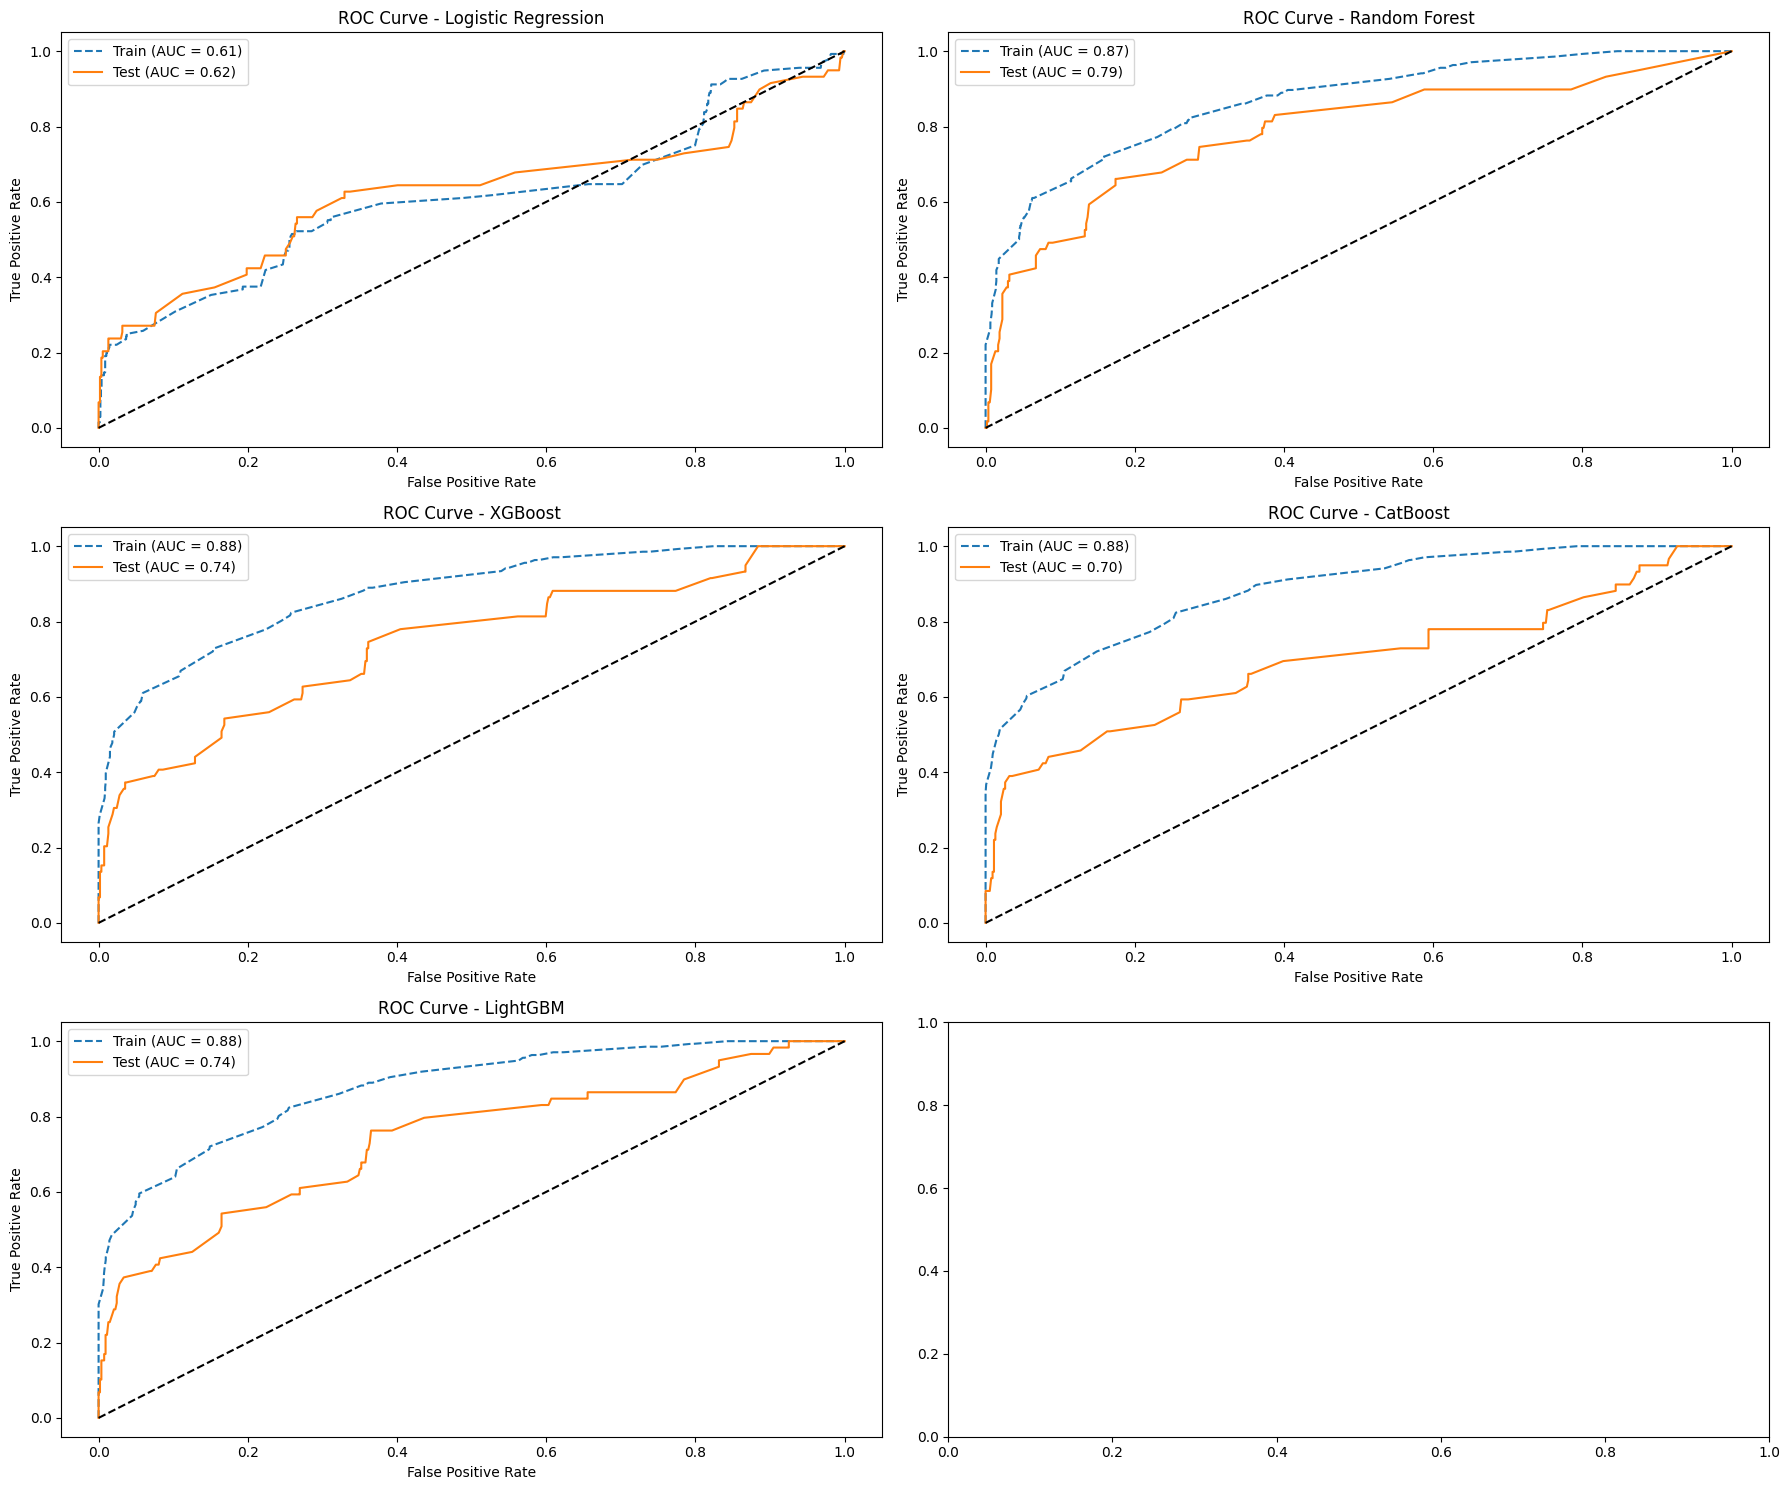

In [176]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Define hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'model__C': [0.01, 0.1, 1, 10],
        'model__solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'model__n_estimators': [50, 100, 200, 500],
        'model__max_depth': [15, 20, 30],
        'model__min_samples_split': [7, 10]
    },
    'XGBoost': {
        'model__n_estimators': [50, 100, 200, 500],
        'model__max_depth': [3, 5, 7, 10],
        'model__learning_rate': [0.01, 0.1, 0.2, 0.3]
    },
    'CatBoost': {
        'model__iterations': [50, 100, 200, 500],
        'model__depth': [4, 6, 8, 10],
        'model__learning_rate': [0.01, 0.1, 0.2, 0.3]
    },
    'LightGBM': {
        'model__n_estimators': [50, 100, 200, 500],
        'model__max_depth': [5, 10, 15],
        'model__learning_rate': [0.01, 0.1, 0.2, 0.3]
    }
}

models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', scale_pos_weight=1),  # Adjust based on class distribution
    'CatBoost': CatBoostClassifier(silent=True),
    'LightGBM': LGBMClassifier(class_weight='balanced'), 
}

# Function to tune the threshold based on Precision-Recall Curve
def tune_threshold(model, X_train, y_train, X_test, y_test):
    # Get predicted probabilities
    y_train_scores = model.predict_proba(X_train)[:, 1]  # Probability of positive class
    y_test_scores = model.predict_proba(X_test)[:, 1]    # Probability of positive class

    # Calculate precision and recall for train and test sets
    precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_train_scores)
    precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_test_scores)

    # Calculate F1 scores for each threshold
    f1_train_scores = 2 * (precision_train * recall_train) / (precision_train + recall_train + 1e-9)  # Avoid division by zero
    f1_test_scores = 2 * (precision_test * recall_test) / (precision_test + recall_test + 1e-9)  # Avoid division by zero

    # Find optimal threshold for train and test datasets
    optimal_idx_train = np.argmax(f1_train_scores)
    optimal_idx_test = np.argmax(f1_test_scores)

    # Choose thresholds for training and testing datasets
    optimal_threshold_train = thresholds_train[optimal_idx_train]
    optimal_threshold_test = thresholds_test[optimal_idx_test]

    print(f"Optimal Threshold (Train): {optimal_threshold_train:.4f}")
    print(f"Optimal Threshold (Test): {optimal_threshold_test:.4f}")

    return optimal_threshold_train, optimal_threshold_test

# Create a pipeline and evaluate each model with hyperparameter tuning
fig, axs = plt.subplots(3, 2, figsize=(18, 15))
axs = axs.flatten()

# Example data (replace with your actual data loading and preprocessing)
# X, y = load_your_data()  # Load your data here
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Assuming X_train_resampled, y_train_resampled are already defined

for idx, (model_name, model) in enumerate(models.items()):
    print(f"\nEvaluating {model_name} with hyperparameter tuning...")

    pipeline = Pipeline(steps=[('model', model)])

    # Create the GridSearchCV object with the model and hyperparameter grid
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, n_jobs=-1, scoring='f1')

    # Fit the GridSearchCV object
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    print(f"Best Parameters: {best_params}")

    # Predict on the training set
    y_train_pred = best_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print("\nTraining Classification Report:")
    print(classification_report(y_train, y_train_pred))

    # Predict probabilities on the test set
    y_test_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # Threshold tuning
    optimal_threshold_train, optimal_threshold_test = tune_threshold(best_model, X_train, y_train, X_test, y_test)

    # Make predictions using the optimal thresholds
    y_train_pred = (best_model.predict_proba(X_train)[:, 1] >= optimal_threshold_train).astype(int)
    y_pred = (y_test_pred_prob >= optimal_threshold_test).astype(int)

    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print("\nTest Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Test Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate and print explicit metrics
    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    test_report = classification_report(y_test, y_pred, output_dict=True)

    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Training Precision: {train_report['1']['precision']:.4f}")
    print(f"Training Recall: {train_report['1']['recall']:.4f}")
    print(f"Training F1 Score: {train_report['1']['f1-score']:.4f}")

    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Testing Precision: {test_report['1']['precision']:.4f}")
    print(f"Testing Recall: {test_report['1']['recall']:.4f}")
    print(f"Testing F1 Score: {test_report['1']['f1-score']:.4f}")

    # Uncomment the following lines if you want to plot ROC Curves as well
    # ROC Curve and AUC for training set
    y_train_pred_prob = best_model.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
    auc_train = roc_auc_score(y_train, y_train_pred_prob)

    axs[idx].plot(fpr_train, tpr_train, label=f'Train (AUC = {auc_train:.2f})', linestyle='--')

    # ROC Curve and AUC for test set
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
    auc_test = roc_auc_score(y_test, y_test_pred_prob)

    axs[idx].plot(fpr_test, tpr_test, label=f'Test (AUC = {auc_test:.2f})')

    axs[idx].plot([0, 1], [0, 1], 'k--')
    axs[idx].set_title(f'ROC Curve - {model_name}')
    axs[idx].set_xlabel('False Positive Rate')
    axs[idx].set_ylabel('True Positive Rate')
    axs[idx].legend(loc='best')

plt.tight_layout()


## Model Evaluation Results



| Model              | Best Parameters                                 | Training Accuracy | Testing Accuracy | Training Optimal Threshold | Testing Optimal Threshold | Training Precision | Testing Precision | Training Recall | Testing Recall | Training F1 Score | Testing F1 Score |
|--------------------|------------------------------------------------|-------------------|------------------|---------------------------|--------------------------|--------------------|-------------------|------------------|-----------------|--------------------|-------------------|
| **Logistic Regression** | `{'model__C': 0.1, 'model__solver': 'liblinear'}` | 0.7173            | 0.9123          | 0.5613                    | 0.8950                   | 0.6250             | 0.6667            | 0.2206           | 0.2373         | 0.3261             | 0.3500            |
| **Random Forest**   | `{'model__max_depth': 20, 'model__min_samples_split': 7, 'model__n_estimators': 50}` | 0.8633            | 0.9123          | 0.5615                    | 0.6946                   | 0.5223             | 0.5854            | 0.6029           | 0.4068         | 0.5597             | 0.4800            |
| **XGBoost**         | `{'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__n_estimators': 500}` | 0.8691            | 0.9056          | 0.6762                    | 0.7101                   | 0.7263             | 0.5366            | 0.5074           | 0.3729         | 0.5974             | 0.4400            |
| **CatBoost**        | `{'model__depth': 10, 'model__iterations': 500, 'model__learning_rate': 0.2}` | 0.8720            | 0.9106          | 0.6684                    | 0.7529                   | 0.7447             | 0.5750            | 0.5147           | 0.3898         | 0.6087             | 0.4646            |
| **LightGBM**        | `{'model__learning_rate': 0.1, 'model__max_depth': 15, 'model__n_estimators': 200}` | 0.8720            | 0.9073          | 0.7555                    | 0.7555                   | 0.7500             | 0.5500            | 0.4853           | 0.3729         | 0.5893             | 0.4444         #   |

## Summary of Findings

1. **Training Accuracy:**
   - **LightGBM** exhibits the highest training accuracy (**87.20%**), closely followed by **CatBoost** (**87.20%**) and **XGBoost** (**86.91%**). **Random Forest** shows a training accuracy of **86.33%**, while **Logistic Regression** lags significantly at **71.73%**, indicating its lower capacity to capture complex relationships in the data.

2. **Testing Accuracy:**
   - All models achieve comparable performance on the testing set, with **Logistic Regression** and **Random Forest** both demonstrating impressive testing accuracy at **91.23%**. **CatBoost** and **LightGBM** show slightly lower accuracies (**91.06%** and **90.73%**, respectively), hinting at potential overfitting.

3. **Precision, Recall, and F1 Score:**
   - **Logistic Regression** leads with the highest testing precision (**66.67%**), indicating its reliability in positive class predictions. However, its low recall (**23.73%**) suggests it misses many actual positive instances.
   - **Random Forest** strikes a better balance, with a testing precision of **58.54%** and a recall of **40.68%**, resulting in the highest F1 score on the test set (**48.00%**).
   - **XGBoost**, **CatBoost**, and **LightGBM** perform similarly, exhibiting lower testing precision and recall compared# to Random Forest.

## Recommendations

**Best Model:** Based on the evaluation metrics, **Random Forest** emerges as the recommended model. Its balanced performance across accuracy, precision, and recall positions it as a robust choice for this classification task.

### Advantages of Random Forest:
- **Robustness to Overfitting:** It effectively mitigates overfitting due to its ensemble nature.
- **Feature Importance:** Offers insights into feature importance, aiding in model interpretation.
- **Versatility:** Capable of handling both numerical and categorical data without extensive preprocessing.

### Disadvantages of Random Forest:
- **Interpretability:** More complex than Logistic Regression, making interpretation challenging.
- **Prediction Speed:** Generally slower in making predictions compared to simpler models.
     |



### Insights on Class Imbalance

A crucial observation from the results is the insufficient representation of class 1 in the dataset. With only 136 instances of class 1 compared to 1247 instances of class 0, the imbalance negatively impacts model performance. Despite employing various strategies like SMOTE, hyperparameter tuning, and model selection, the model struggles to achieve a satisfactory recall and F1 score for class 1. This indicates that the model may have difficulty generalizing from such a limited amount of data.

To further improve the F1 score for class 1, consider the following approaches:

**1. Data Augmentation** - Explore techniques to synthesize new samples for the minority class beyond SMOTE, such as data augmentation techniques tailored to your specific features.

**2. Collect More Data** - If feasible, obtaining additional labeled data for class 1 could significantly enhance model training and evaluation.

**3. Alternative Evaluation Metrics** - While focusing on the F1 score is vital, it may also be beneficial to assess other metrics, such as the area under the precision-recall curve (AUC-PR), which can provide additional insights into the model’s performance with respect to the minority class.

### Conclusion
In summary, while the Random Forest model demonstrates solid performance overall, the insufficiency of data for class 1 presents a challenge that hinders the achievement of a higher F1 score. Continued focus on handling class imbalance and exploring innovative data augmentation methods may yield better results in future iterations.
